In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack
from astropy.cosmology import FlatLambdaCDM
from astropy.io import fits
from vast.voidfinder.postprocessing import open_fits_file


In [2]:
#print properites of galaxy catalog
with open(f'iron_info.pickle', 'rb') as iron_info_file:
    
    iron_info = pickle.load(iron_info_file)
    #settings
    print('--- Catalog Settings ---')
    print('source file:',iron_info['file'])
    print('mask file:',iron_info['mask_file'])
    print('first few indexes of mask:',iron_info['mask'][:5] )
    print('min redshift:',iron_info['zmin'])
    print('max redshift:',iron_info['zmax'] )
    print('redshift buffer:',iron_info['zmax_buffer'] )
    print('magnitude limit:',iron_info['mag_lim'])
    print('magnitude buffer:',iron_info['mag_lim_buffer'] )
    #performance
    print('--- Catalog Creation ---')
    print(iron_info['file_count'], "target observations read in")
    print(iron_info['bgs_bright_count'], "BGS Bright galaxies")
    print(iron_info['zlim_count'], "galaxies in redshift limits")
    print(iron_info['masked_count'], "galaxies within angular mask")
    print(iron_info['vlim_count'], "galaxies within magnitude cut")
    print(iron_info['final_count'], "galaxies in final catalog")
    print(iron_info['final_count_ngc'],'galaxies in NGC')
    print(iron_info['final_count_sgc'],'galaxies in SGC')
    print(iron_info['final_count_buffer'],'galaxies in final catalog with magnitude and redshift buffer')
    
    # there are additional entries for the settings that 
    # aren't printed here (values of zlim, mag_lim, etc.)

--- Catalog Settings ---
source file: /global/cfs/cdirs/desi/public/dr1/vac/dr1/fastspecfit/iron/v2.1/catalogs/fastspec-iron.fits
mask file: ./mask/iron_mask.fits
first few indexes of mask: [(0, 45.        , 0.03730194,  True, False, 4, 0.25)
 (1, 45.04394531, 0.0746039 ,  True, False, 4, 0.25)
 (2, 44.95605469, 0.0746039 ,  True, False, 4, 0.25)
 (3, 45.        , 0.11190589,  True, False, 4, 0.25)
 (4, 45.08789062, 0.11190589,  True, False, 4, 0.25)]
min redshift: 0.0
max redshift: 0.24
redshift buffer: 0.25
magnitude limit: -20.0
magnitude buffer: -19.5
--- Catalog Creation ---
17995820 target observations read in
4741408 BGS Bright galaxies
2826233 galaxies in redshift limits
1217372 galaxies within angular mask
488334 galaxies within magnitude cut
483293 galaxies in final catalog
402642 galaxies in NGC
80651 galaxies in SGC
798832 galaxies in final catalog with magnitude and redshift buffer


In [2]:
#read in galaxies
iron_gals = vstack([Table.read('iron_ngc.fits'),Table.read('iron_sgc.fits')])

In [3]:
#read in mask
iron_mask = Table.read('mask/iron_mask_smoothed.fits')['DONE']

In [4]:
#matter fraction
omega_M=0.315
#create cosmology
csm0 = FlatLambdaCDM(H0=100, Om0=omega_M)

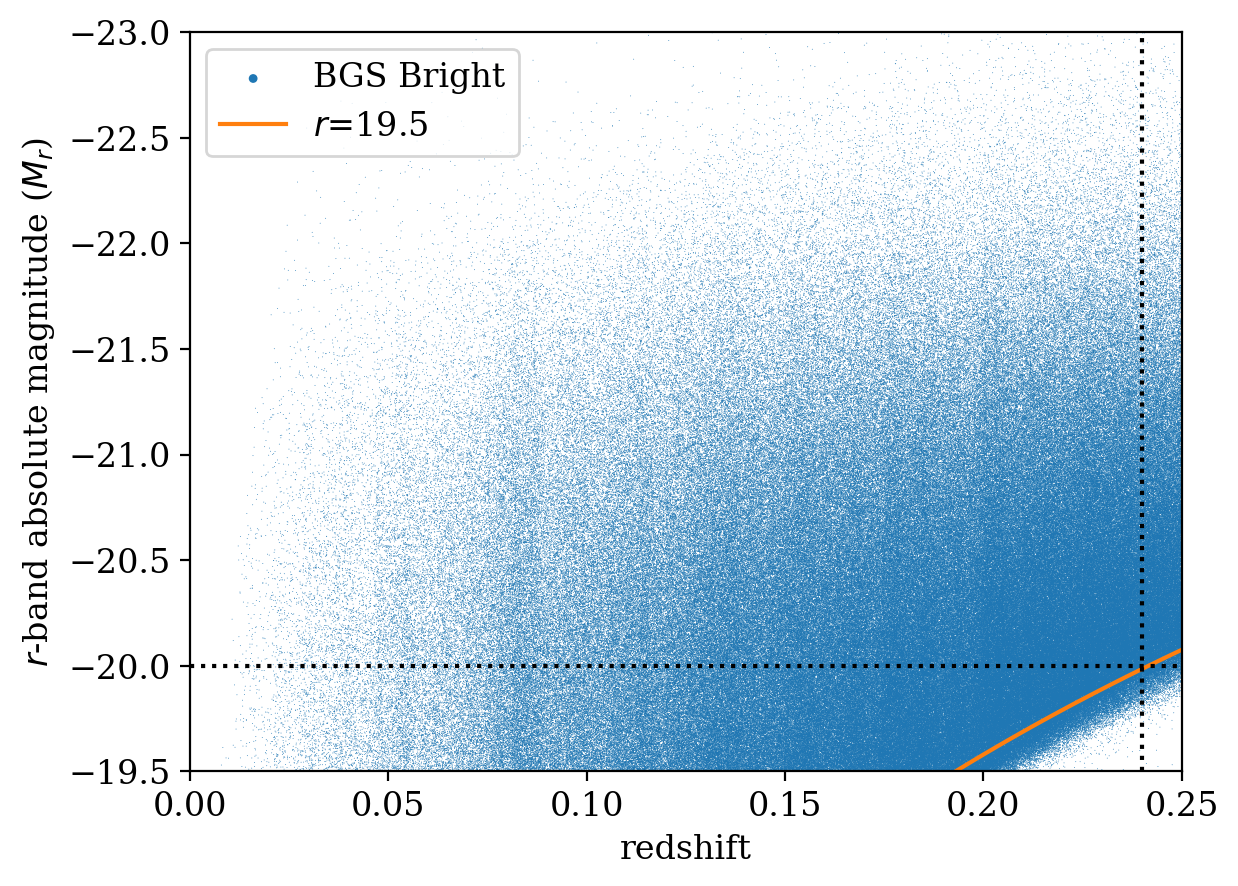

In [5]:
plt.rcParams.update({'font.size': 12, 'font.family':'serif',"axes.titley":1.03 })
plt.figure(dpi=200)
plt.rcParams["legend.markerscale"] = 10
plt.scatter(iron_gals['redshift'],iron_gals['rabsmag'],s=.1,alpha=1,edgecolor="none",label="BGS Bright")
x=np.linspace(0.01,0.3,100) #redshift
fx = 19.5 - np.array(csm0.distmod(x))
plt.plot(x,fx+0.97*(x-0.1),label='$r$=19.5',color='#ff7f0e')
plt.axvline(0.24, color="k",linestyle=":")
plt.axhline(-20, color="k",linestyle=":")
plt.xlabel("redshift",fontsize=12)
plt.ylabel("$r$-band absolute magnitude ($M_r$)",fontsize=12)
plt.ylim((-19.5,-23))
plt.xlim((0,0.25))
plt.legend(loc="best")
plt.savefig("mag_redshift.pdf", bbox_inches = "tight")

In [15]:
dmp_path = '/global/cfs/cdirs/desi/users/hrincon/DESIVAST/DMP/DESIVAST_figures.fits'
dmp_file = open_fits_file(dmp_path)
hdu = fits.BinTableHDU(Table(iron_gals[['redshift','rabsmag']], names=['REDSHIFT','RABSMAG']))
hdu.name = 'FIG1'
dmp_file.append(hdu)
dmp_file.writeto(dmp_path, overwrite=True)


